## Assignment 1 

Instructions
The attached Excel file contains data on the present allocation of the Infrastructure Investment and Jobs Act funding by State and Territory.

Your story (Data Visualization(s) ) should address the following questions:

Is the allocation equitable based on the population of each of the States and Territories, or is bias apparent?

Does the allocation favor the political interests of the Biden administration?

You will need to source data on the current (estimated) population of each of the States and Territories (accuracy is more important than precision) and on the official election results of the 2020 Presidential election.

In [37]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show
from matplotlib.patches import Patch
import plotly.express as px



### Load Files

In [40]:
inf_df = pd.read_excel('/Users/nanafrimpong/Desktop/SPS Fall 2025/Data 608 Visual Analytics/Assignments/Assignment 1/IIJA FUNDING AS OF MARCH 2023.xlsx')
inf_df.head()

,"State, Teritory or Tribal Nation",Total (Billions)
0,ALABAMA,3.0000
1,ALASKA,3.7000
2,AMERICAN SAMOA,0.0686
3,ARIZONA,3.5000
4,ARKANSAS,2.8000


In [42]:
pop_df=pd.read_excel('/Users/nanafrimpong/Desktop/SPS Fall 2025/Data 608 Visual Analytics/Assignments/Assignment 1/US Population Data.xlsx')
pop_df.head()

,"State, Teritory or Tribal Nation",Population
0,ALABAMA,5157699
1,ALASKA,740133
2,AMERICAN SAMOA,46765
3,ARIZONA,7582384
4,ARKANSAS,3088354


In [44]:
elec_df=pd.read_excel('/Users/nanafrimpong/Desktop/SPS Fall 2025/Data 608 Visual Analytics/Assignments/Assignment 1/election results.xlsx')
elec_df.head()

,"State, Teritory or Tribal Nation",Party
0,ALABAMA,Republican
1,ALASKA,Republican
2,AMERICAN SAMOA,Democrat
3,ARIZONA,Democrat
4,ARKANSAS,Republican


In [46]:
# Cleaning and Merging 
inf_df.columns = ['State', 'Total_Funding_Billions']
pop_df.columns = ['State', 'Population']
elec_df.columns = ['State', 'Party']

pop_df['Population'] = pop_df['Population'].astype(str).str.replace(',', '').astype(float)

elec_df['Party'] = elec_df['Party'].str.upper().str.strip()
elec_df['Party'] = elec_df['Party'].replace({
    'REPUBLICAN': 'Republican',
    'DEMOCRAT': 'Democrat',})

In [48]:
# Merging datasets
merged_df = inf_df.merge(pop_df, on='State', how='inner')
merged_df = merged_df.merge(elec_df, on='State', how='inner')
merged_df.head()

,State,Total_Funding_Billions,Population,Party
0,ALABAMA,3.0000,5157699.0,Republican
1,ALASKA,3.7000,740133.0,Republican
2,AMERICAN SAMOA,0.0686,46765.0,Democrat
3,ARIZONA,3.5000,7582384.0,Democrat
4,ARKANSAS,2.8000,3088354.0,Republican


In [50]:
# Funding per capita  in USD
merged_df['Funding_Per_Capita'] = (merged_df['Total_Funding_Billions'] * 1e9) / merged_df['Population']

In [52]:
# Main states dataframe
main_states_df = merged_df[~merged_df['State'].isin(['AMERICAN SAMOA', 'GUAM', 'NORTHERN MARIANA ISLANDS', 
                                                     'PUERTO RICO', 'US VIRGIN ISLANDS', 'TRIBAL COMMUNITIES', 'DISTRICT OF COLUMBIA'])]

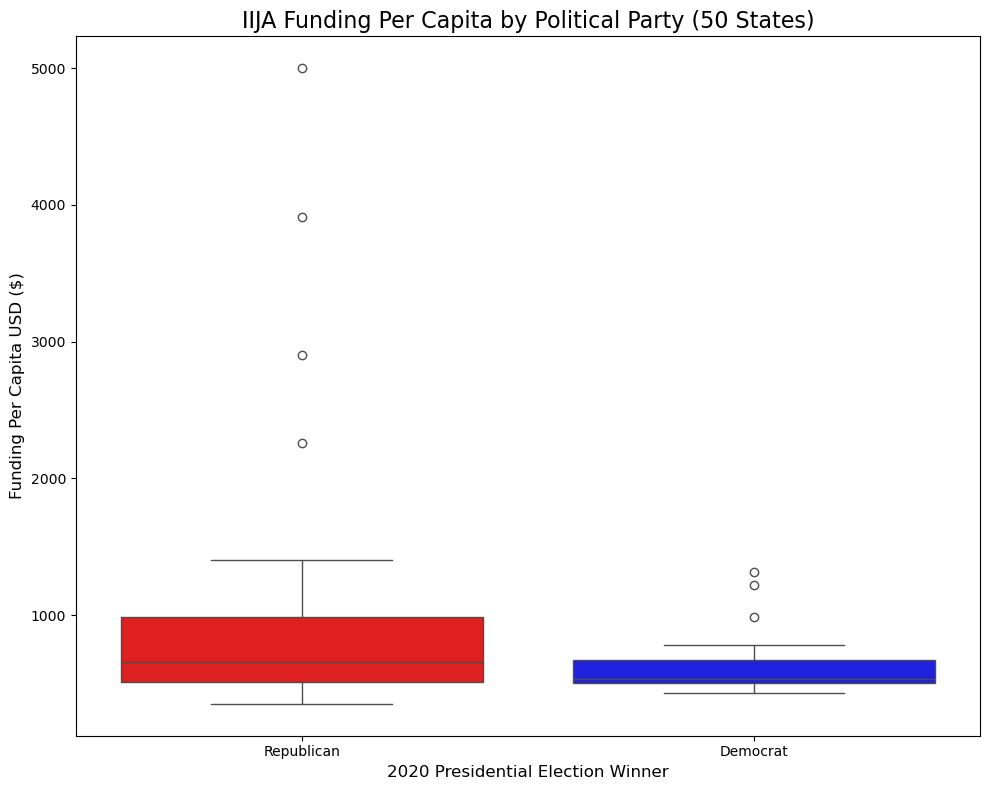

In [212]:
# Funnding per capita
plt.figure(figsize=(10, 8))
sns.boxplot(data=main_states_df, x='Party', y='Funding_Per_Capita', hue='Party',  palette={'Democrat': 'blue', 'Republican': 'red'} )
plt.title('IIJA Funding Per Capita by Political Party (50 States)', fontsize=16, fontweight='light')
plt.ylabel('Funding Per Capita USD ($)', fontsize=12)
plt.xlabel('2020 Presidential Election Winner', fontsize=12)
plt.tight_layout()
plt.show()

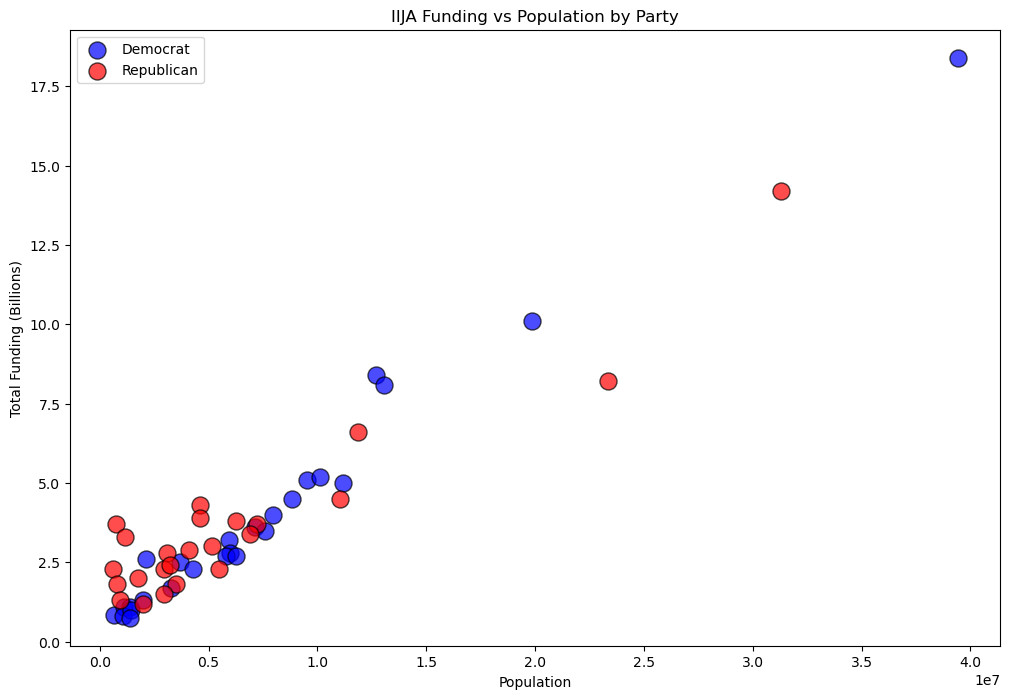

In [170]:
# Scatter Plot for funding versus the population by party
# mappping color for party 
#loop twice, first find democrat then find the republican
colors = {'Democrat': 'blue', 'Republican': 'red'}
plt.figure(figsize=(12, 8))

for party, color in colors.items():
    # smaller dataframe for rows specific party that state belong 
    subset = main_states_df[main_states_df['Party'] == party]
    plt.scatter(
        subset['Population'], 
        subset['Total_Funding_Billions'], 
        color=color, alpha=0.7, label=party, s=150, edgecolor="black"
    )

plt.xlabel("Population")
plt.ylabel("Total Funding (Billions)")
plt.title("IIJA Funding vs Population by Party")
plt.legend()
plt.show()

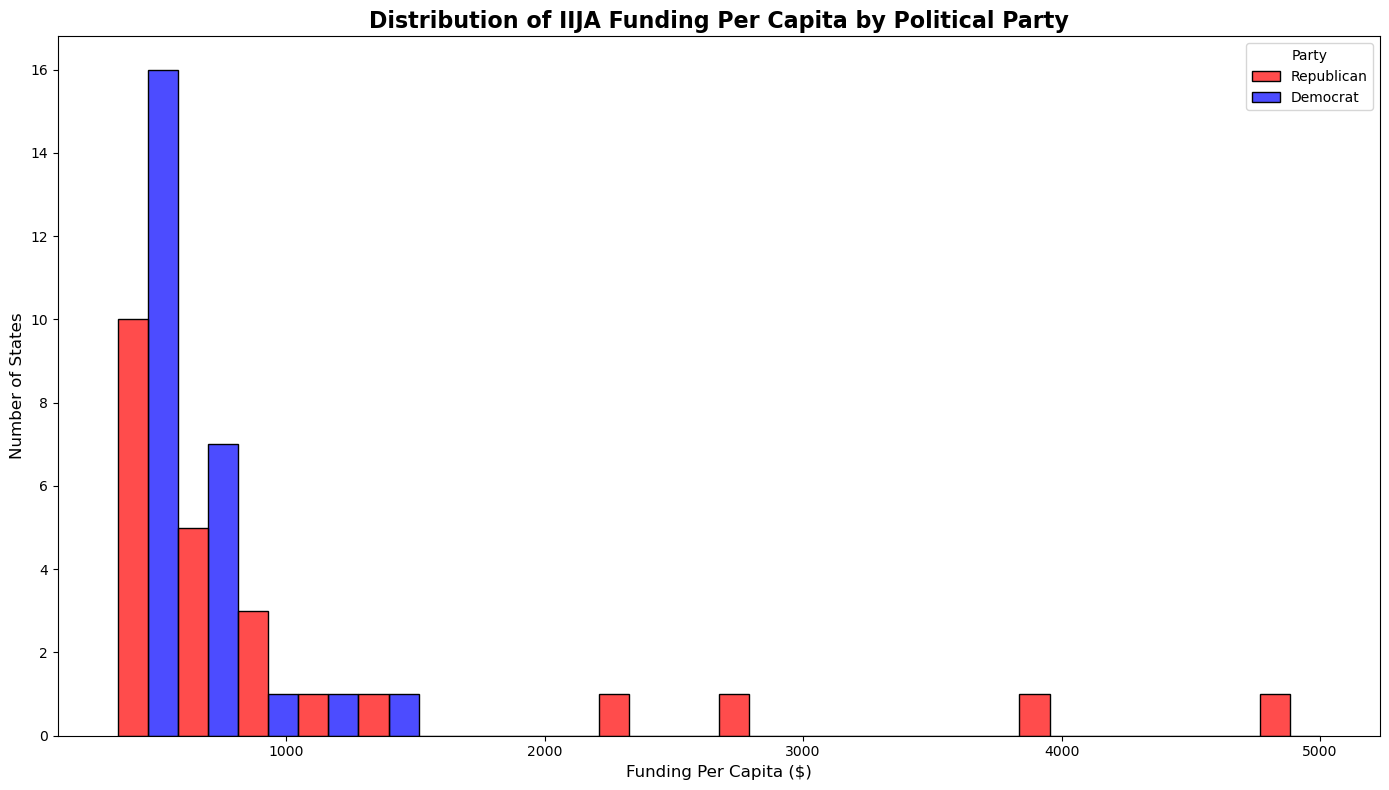

In [172]:
# Funding per capita distribution
plt.figure(figsize=(14, 8))
sns.histplot( data=main_states_df,x='Funding_Per_Capita',hue='Party',multiple='dodge', bins=20,alpha=0.7,
             palette={'Democrat': 'blue', 'Republican': 'red'})

plt.title('Distribution of IIJA Funding Per Capita by Political Party', fontsize=16, fontweight='bold')
plt.xlabel('Funding Per Capita ($)', fontsize=12)
plt.ylabel('Number of States', fontsize=12)
plt.tight_layout()
plt.show()

In [174]:
# Figuring  which are the top and bottom states to get funding
main_states_df = main_states_df.sort_values('Funding_Per_Capita', ascending=False)
top_bottom = pd.concat([main_states_df.head(10), main_states_df.tail(10)])


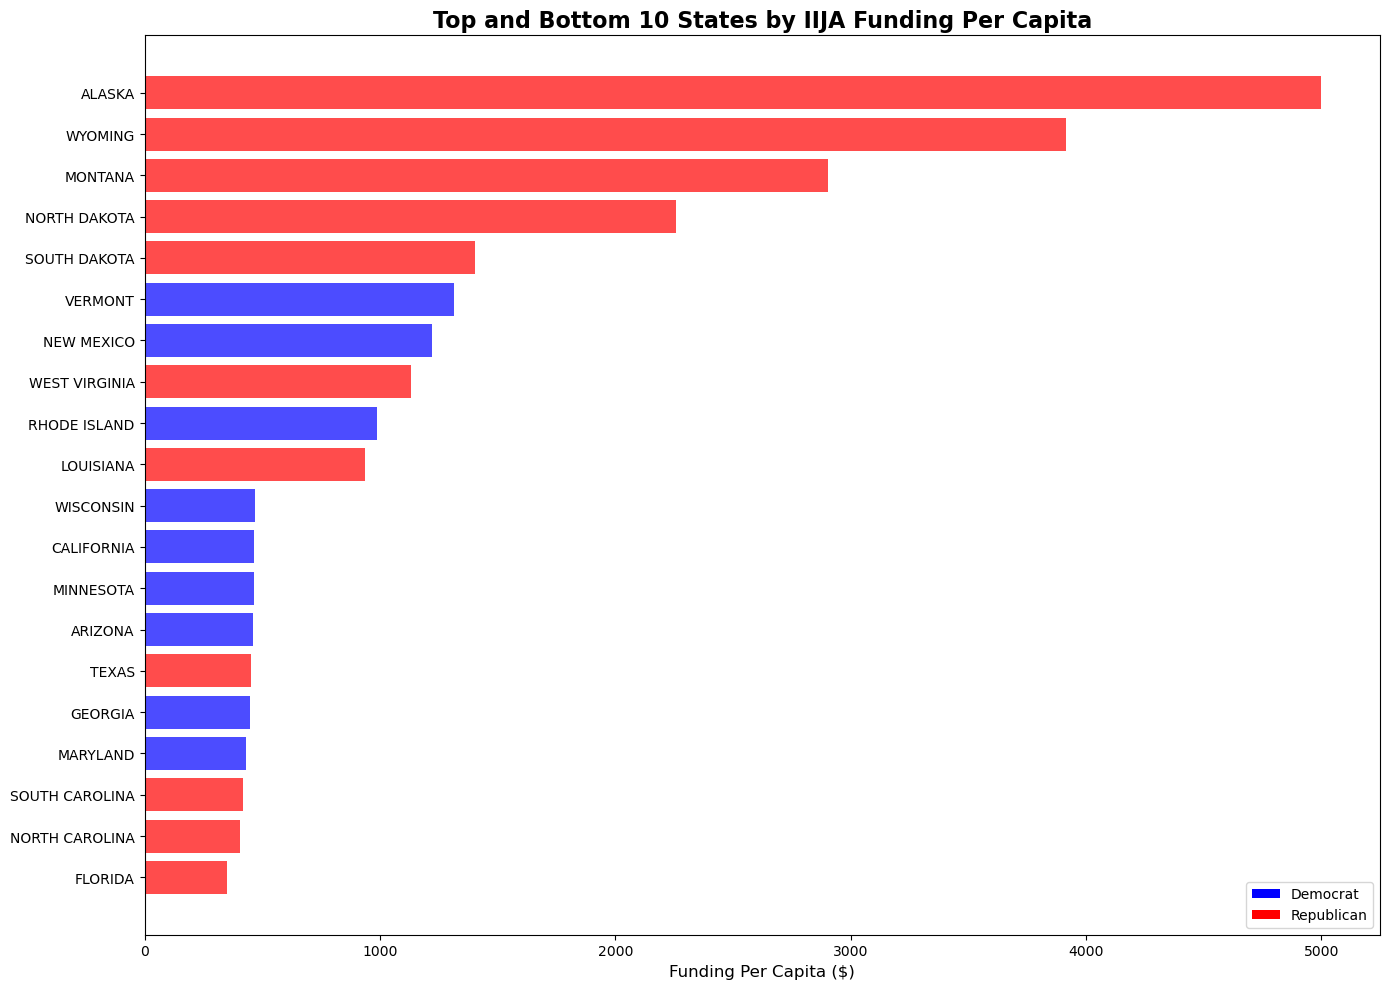

In [176]:
# Clean Party labels
top_bottom['Party'] = top_bottom['Party'].str.strip().str.title()

# Define color map again
color_map = {'Democrat': 'blue', 'Republican': 'red'}

plt.figure(figsize=(14, 10))
colors = [color_map[party] for party in top_bottom['Party']]
bars = plt.barh(
    top_bottom['State'], 
    top_bottom['Funding_Per_Capita'], 
    color=colors, alpha=0.7
)

plt.xlabel('Funding Per Capita ($)', fontsize=12)
plt.title('Top and Bottom 10 States by IIJA Funding Per Capita', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.show

legend_elements = [Patch(facecolor='blue', label='Democrat'),
                   Patch(facecolor='red', label='Republican')]
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

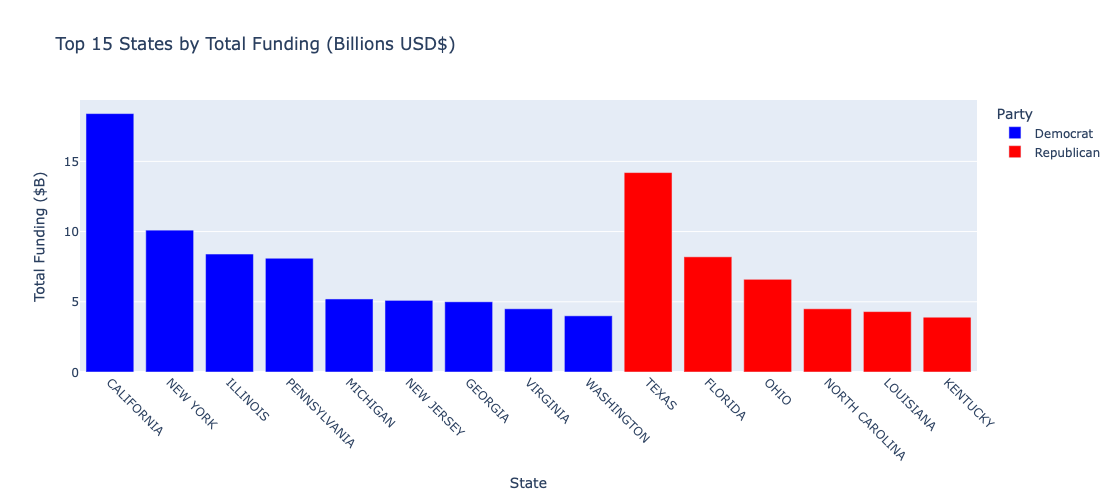

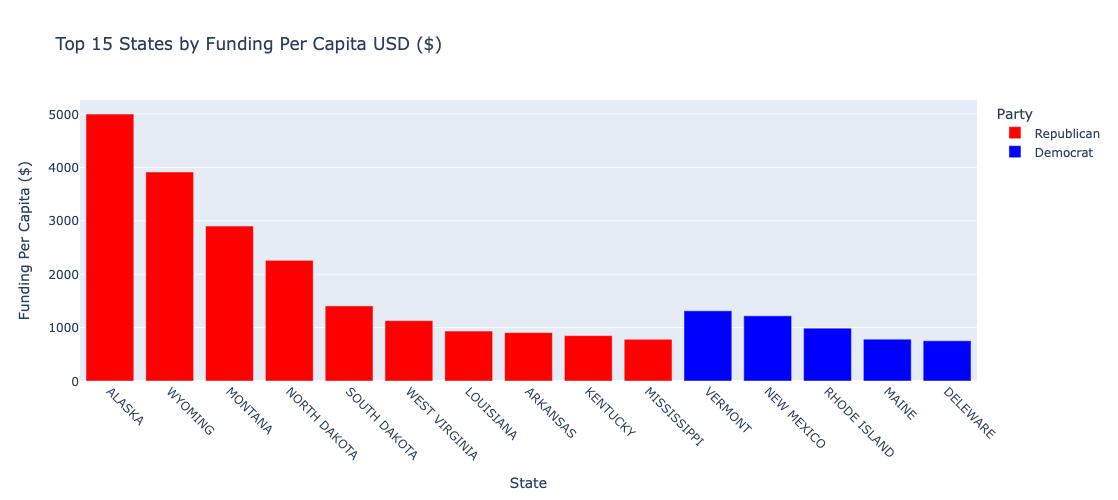

In [178]:
# Create a bar chart of top 15 states by total funding
top_states = main_states_df.nlargest(15, 'Total_Funding_Billions')

fig1 = px.bar(top_states, 
             x='State', 
             y='Total_Funding_Billions',
             color='Party',
             color_discrete_map={'Democrat': 'blue', 'Republican': 'red'},
             title='Top 15 States by Total Funding (Billions USD$)',
             labels={'Total_Funding_Billions': 'Total Funding ($B)', 'State': 'State'},
             hover_data=['Population', 'Funding_Per_Capita'])

fig1.update_layout(height=500, width=800, xaxis_tickangle=45)
fig1.show()

# Create a bar chart of top 15 states by per capita funding
top_per_capita = main_states_df.nlargest(15, 'Funding_Per_Capita')

fig2 = px.bar(top_per_capita, 
             x='State', 
             y='Funding_Per_Capita',
             color='Party',
             color_discrete_map={'Democrat': 'blue', 'Republican': 'red'},
             title='Top 15 States by Funding Per Capita USD ($)',
             labels={'Funding_Per_Capita': 'Funding Per Capita ($)', 'State': 'State'},
             hover_data=['Total_Funding_Billions', 'Population'])

fig2.update_layout(height=500, width=800, xaxis_tickangle=45)
fig2.show()

In [179]:
territories_df = merged_df[merged_df['State'].isin(['AMERICAN SAMOA', 'GUAM', 'NORTHERN MARIANA ISLANDS', 
                                                  'PUERTO RICO', 'US VIRGIN ISLANDS'])]
territories_df.head()

,State,Total_Funding_Billions,Population,Party,Funding_Per_Capita
2,AMERICAN SAMOA,0.0686,46765.0,Democrat,1466.909013
12,GUAM,0.1426,167777.0,Democrat,849.937715
37,NORTHERN MARIANA ISLANDS,0.0833,44278.0,Democrat,1881.295451
42,PUERTO RICO,0.9937,3203000.0,Democrat,310.240400
49,US VIRGIN ISLANDS,0.1483,87146.0,Democrat,1701.741904


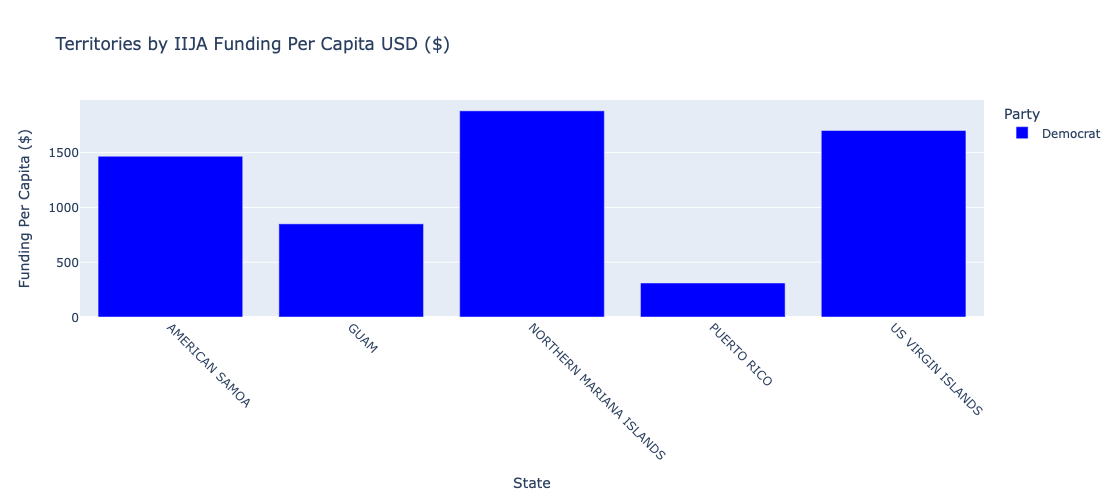

In [214]:
fig3 = px.bar(territories_df, 
             x='State', 
             y='Funding_Per_Capita',
             color='Party',
             color_discrete_map={'Democrat': 'blue', 'Republican': 'red'},
             title=' Territories by IIJA Funding Per Capita USD ($)',
             labels={'Funding_Per_Capita': 'Funding Per Capita ($)', 'State': 'State'},
             hover_data=['Total_Funding_Billions', 'Population'])

fig3.update_layout(height=500, width=800, xaxis_tickangle=45)
fig3.show()

In [224]:
democrat_states = main_states_df[main_states_df['Party'] == 'Democrat']
republican_states = main_states_df[main_states_df['Party'] == 'Republican']


print("Joe Biden Investmen tStatistical Summary of Biden:")
print(f"Democrat states (n={len(democrat_states)}):")
print(f"  Mean funding per capita: ${democrat_states['Funding_Per_Capita'].mean():.2f}")
print(f"  Median funding per capita: ${democrat_states['Funding_Per_Capita'].median():.2f}")

print(f"\nRepublican states (n={len(republican_states)}):")
print(f"  Mean funding per capita: ${republican_states['Funding_Per_Capita'].mean():.2f}")
print(f"  Median funding per capita: ${republican_states['Funding_Per_Capita'].median():.2f}")

print(f"\nTerritories funding per capita analysis:")
for _, row in territories_df.iterrows():
    print(f" \n {row['State']}: ${row['Funding_Per_Capita']:,.2f}")

print(f"\nTotal IIJ Funding: ${main_states_df['Total_Funding_Billions'].sum():.1f} Billion")
print(f"Average per state: ${main_states_df['Total_Funding_Billions'].mean():.2f} Billion")
print(f"Median per state: ${main_states_df['Total_Funding_Billions'].median():.2f} Billion")
print(f"\nTop 5 states by total funding:")
for i, row in main_states_df.nlargest(5, 'Total_Funding_Billions').iterrows():
    print(f"  {row['State']}: ${row['Total_Funding_Billions']}B (${row['Funding_Per_Capita']:,.0f} per capita)")

print(f"\nTop 5 states by per capita funding:")
for i, row in main_states_df.nlargest(5, 'Funding_Per_Capita').iterrows():
    print(f"  {row['State']}: ${row['Funding_Per_Capita']:,.0f} per capita (${row['Total_Funding_Billions']}B total)")

Joe Biden Investmen tStatistical Summary of Biden:
Democrat states (n=26):
  Mean funding per capita: $627.19
  Median funding per capita: $535.18

Republican states (n=24):
  Mean funding per capita: $1147.12
  Median funding per capita: $658.28

Territories funding per capita analysis:
 
 AMERICAN SAMOA: $1,466.91
 
 GUAM: $849.94
 
 NORTHERN MARIANA ISLANDS: $1,881.30
 
 PUERTO RICO: $310.24
 
 US VIRGIN ISLANDS: $1,701.74

Total IIJ Funding: $190.5 Billion
Average per state: $3.81 Billion
Median per state: $2.85 Billion

Top 5 states by total funding:
  CALIFORNIA: $18.4B ($467 per capita)
  TEXAS: $14.2B ($454 per capita)
  NEW YORK: $10.1B ($508 per capita)
  ILLINOIS: $8.4B ($661 per capita)
  FLORIDA: $8.2B ($351 per capita)

Top 5 states by per capita funding:
  ALASKA: $4,999 per capita ($3.7B total)
  WYOMING: $3,914 per capita ($2.3B total)
  MONTANA: $2,902 per capita ($3.3B total)
  NORTH DAKOTA: $2,260 per capita ($1.8B total)
  SOUTH DAKOTA: $1,406 per capita ($1.3B tot

Based on the data, the Biden administration’s allocation of funding is not equitable across states and territories.
We can observe that the allocation is not equitable on a per capita basis, as summarized in the statistical summary.
Our graph shows that states that lean Republican are likely to receive more funding per resident than Democrat-leaning states, suggesting disparities in funding distribution. This disparity is particularly noticeable in the territories, as Puerto Rican residents receive less than those in the U.S. Virgin Islands.
The data contradicts the notion that Biden favors his own political party. In fact, Republican-leaning states are receiving higher average and median per capita funding for their residents. The reasons for such disparity are likely related to infrastructure needs, population density, and areas that have historically been underfunded in terms of infrastructure.